<a href="https://colab.research.google.com/github/sasurasa/2025/blob/main/HP_project_310824SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [3]:
def non_null_values(row, columns):
    return [row[col] for col in columns if pd.notnull(row[col])]

In [4]:
hp_all = pd.read_csv('/content/hp_all_train.csv', header=None)
hp_all.head()

<ipython-input-4-aa7d69cc7630>:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203) have mixed types. Specify dtype option on import or set low_memory=False.
  hp_all = pd.read_csv('/content/hp_all_train.csv', header=None)


0           1           2           3           4           5    \
0  HP:0000347  HP:0003020  HP:0009381  HP:0000204  HP:0000625         NaN   
1  HP:0000347  HP:0003021  HP:0009381  HP:0000204  HP:0000625         NaN   
2  HP:0000347  HP:0003022  HP:0009381  HP:0000204  HP:0000625         NaN   
3  HP:0000347  HP:0009381  HP:0000204  HP:0000625         NaN         NaN   
4  HP:0001903  HP:0000347  HP:0003022  HP:0009381  HP:0000204  HP:0000625   

   6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  Na

In [5]:
def non_null_values(row):
    return [value for value in row if pd.notnull(value)]

hp_list = hp_all.apply(non_null_values, axis=1)

In [6]:
from itertools import permutations
transactions = list(hp_list) #Convert dataframe to a list of list
flattened = [item for transaction in transactions for item in transaction] #Takeout individual items to a big list
items = list(set(flattened)) #Reduce to unique set

In [7]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

HP:0000002  HP:0000003  HP:0000006  HP:0000008  HP:0000009  HP:0000010  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000011  HP:0000012  HP:0000013  HP:0000014  HP:0000015  HP:0000016  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000017  HP:0000020  HP:0000021  HP:0000023  HP:0000024  HP:0000025  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000026  HP:0000027  HP:0000028  HP:0000029  HP:0000031  HP:0000032  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000033  HP:0000034  HP:0000035  HP:0000036  HP:0000037  HP:0000039  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000040  HP:0000041  HP:0000044  HP:0000045  HP:0000046  HP:0000047  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000048  HP:0000049  HP:0000050  HP:0000051  HP:0000053  HP:0000054  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000059  HP:0000060  HP:0000061  HP:0000062  HP:0000063  HP:0000064  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000065  HP:0000066  HP:0000069  HP:0000070  HP:0000071  HP:0000072  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       

In [8]:
hp_onehot = onehot.astype(int)
hp_onehot.head()

HP:0000002  HP:0000003  HP:0000006  HP:0000008  HP:0000009  HP:0000010  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000011  HP:0000012  HP:0000013  HP:0000014  HP:0000015  HP:0000016  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000017  HP:0000020  HP:0000021  HP:0000023  HP:0000024  HP:0000025  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000026  HP:0000027  HP:0000028  HP:0000029  HP:0000031  HP:0000032  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000033  HP:0000034  HP:0000035  HP:0000036  HP:0000037  HP:0000039  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000040  HP:0000041  HP:0000044  HP:0000045  HP:0000046  HP:0000047  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000048  HP:0000049  HP:0000050  HP:0000051  HP:0000053  HP:0000054  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000059  HP:0000060  HP:0000061  HP:0000062  HP:0000063  HP:0000064  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000065  HP:0000066  HP:0000069  HP:0000070  HP:0000071  HP:0000072  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0       

In [9]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [10]:
#Get a frequent basket list (lower threshold of min_support)
hp_fis_0005 = apriori(onehot, min_support=0.0005, max_len=15, use_colnames=True, low_memory= True)
len(hp_fis_0005)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28851

In [11]:
hp_fis_0005.to_csv('hp_fis_0005.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
hp_fis_0005.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets
28841  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...
28842  0.000534  (HP:0000969, HP:0001888, HP:0001347, HP:000174...
28843  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...
28844  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...
28845  0.000534  (HP:0002904, HP:0000969, HP:0001347, HP:000174...
28846  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...
28847  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000174...
28848  0.000534  (HP:0002904, HP:0001888, HP:0001347, HP:000174...
28849  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...
28850  0.000534  (HP:0002904, HP:0000969, HP:0001888, HP:000134...

In [13]:
#Create ML models
model_1 = association_rules(hp_fis_0005, metric = 'support', min_threshold = 0.0005)
len(model_1)
model_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents   consequents  antecedent support  consequent support  \
0  (HP:0000003)  (HP:0002023)            0.003528            0.010020   
1  (HP:0002023)  (HP:0000003)            0.010020            0.003528   
2  (HP:0000020)  (HP:0000967)            0.002342            0.002609   
3  (HP:0000967)  (HP:0000020)            0.002609            0.002342   
4  (HP:0000020)  (HP:0000978)            0.002342            0.009219   

    support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.000771    0.218487  21.805430  0.000735    1.266749       0.957518  
1  0.000771    0.076923  21.805430  0.000735    1.079512       0.963797  
2  0.000563    0.240506  92.193182  0.000557    1.313232       0.991475  
3  0.000563    0.215909  92.193182  0.000557    1.272376       0.991740  
4  0.000563    0.240506  26.086817  0.000542    1.304528       0.963924

In [14]:
model_1['antecedents'] = model_1['antecedents'].apply(lambda a: ','.join(list(a)))
model_1['consequents'] = model_1['consequents'].apply(lambda a: ','.join(list(a)))
model_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  antecedent support  consequent support   support  \
0  HP:0000003  HP:0002023            0.003528            0.010020  0.000771   
1  HP:0002023  HP:0000003            0.010020            0.003528  0.000771   
2  HP:0000020  HP:0000967            0.002342            0.002609  0.000563   
3  HP:0000967  HP:0000020            0.002609            0.002342  0.000563   
4  HP:0000020  HP:0000978            0.002342            0.009219  0.000563   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.218487  21.805430  0.000735    1.266749       0.957518  
1    0.076923  21.805430  0.000735    1.079512       0.963797  
2    0.240506  92.193182  0.000557    1.313232       0.991475  
3    0.215909  92.193182  0.000557    1.272376       0.991740  
4    0.240506  26.086817  0.000542    1.304528       0.963924

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


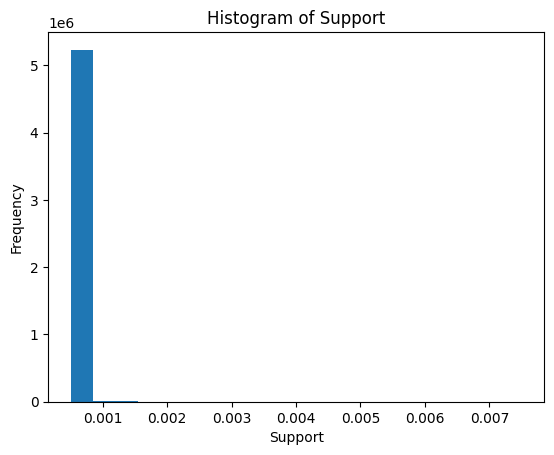

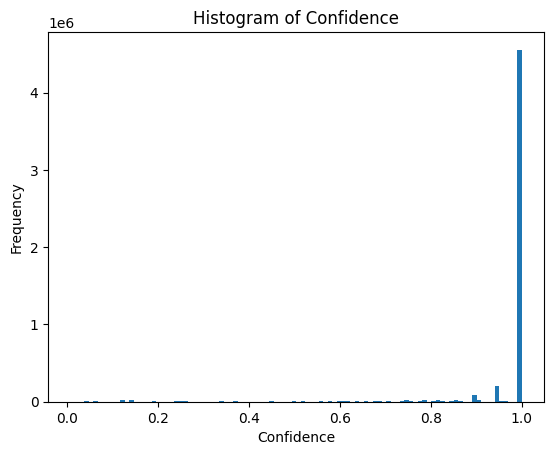

In [15]:
#Draw histogram of support
plt.hist(model_1['support'], bins=20)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Histogram of Support')
plt.show()
#Draw histogram of confidence
plt.hist(model_1['confidence'], bins=100)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence')
plt.show()

In [16]:
#Important! Select by support (origi:3991782)
print('before', len(model_1))
model_1_filter = model_1[(model_1['support'] >= 0.0001) & (model_1['confidence'] >= 0.1)]
print('after', len(model_1_filter))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


before 5244214
after 5213167


In [17]:
model_1_filter.to_csv('model_1_filter.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
model_1_col = model_1_filter[['antecedents', 'consequents', 'support', 'confidence']].copy()
model_1_col.rename(columns={'antecedents': 'input', 'consequents': 'output'}, inplace=True)
def count_words_starting_with_HP(item):
  words = item.split(',')
  count = sum(1 for word in words if word.startswith('HP:'))
  return count
model_1_col['in_length'] = model_1_col['input'].apply(count_words_starting_with_HP)
model_1_col['out_length'] = model_1_col['output'].apply(count_words_starting_with_HP)
model_1_col.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                                             output  \
5244208  HP:0100702  HP:0002904,HP:0000969,HP:0001888,HP:0001347,HP...   
5244209  HP:0003155  HP:0002904,HP:0000969,HP:0001888,HP:0001347,HP...   
5244210  HP:0003198  HP:0002904,HP:0000969,HP:0001888,HP:0001347,HP...   
5244211  HP:0009830  HP:0002904,HP:0000969,HP:0001888,HP:0001347,HP...   
5244212  HP:0001923  HP:0002904,HP:0000969,HP:0001888,HP:0001347,HP...   

          support  confidence  in_length  out_length  
5244208  0.000534    0.236842          1          13  
5244209  0.000534    0.260870          1          13  
5244210  0.000534    0.144000          1          13  
5244211  0.000534    0.141732          1          13  
5244212  0.000534    0.450000          1          13

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


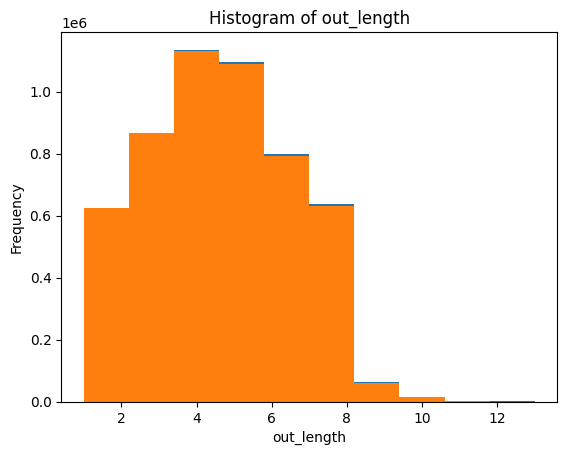

In [19]:
plt.hist(model_1_col['in_length'], bins=10)
plt.xlabel('in_length')
plt.ylabel('Frequency')
plt.title('Histogram of in_length')

plt.hist(model_1_col['out_length'], bins=10)
plt.xlabel('out_length')
plt.ylabel('Frequency')
plt.title('Histogram of out_length')
plt.show()

In [20]:
#Aggregate the values of the output on the input
model_1_col_agg = model_1_col.groupby('input')['output'].apply(','.join).reset_index()
len(model_1_col_agg)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27003

In [21]:
model_1_col_agg.to_csv('model_1_final.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#Place holder here!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#Get_in validation set
hp_val = pd.read_csv('/content/hp_val_dedup.csv', header=None)
hp_val.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-614f98d433a3>:2: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188) have mixed types. Specify dtype option on

0           1           2           3    4    5    6    7    8    \
0  HP:0001258  HP:0002313  HP:0007020         NaN  NaN  NaN  NaN  NaN  NaN   
1  HP:0004322  HP:0000365  HP:0002013  HP:0001250  NaN  NaN  NaN  NaN  NaN   
2  HP:0001894  HP:0001332  HP:0012452         NaN  NaN  NaN  NaN  NaN  NaN   
3  HP:0001894  HP:0012452         NaN         NaN  NaN  NaN  NaN  NaN  NaN   
4  HP:0012452  HP:0011873         NaN         NaN  NaN  NaN  NaN  NaN  NaN   

   9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  N

In [26]:
#Get rid of Null
hp_val_list = hp_val.apply(non_null_values, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
transactions_2 = list(hp_val_list)
flattened_2 = [item for transaction_2 in transactions_2 for item in transaction_2]
items_2 = list(set(flattened_2))
encoder_2 = TransactionEncoder().fit(transactions_2)
onehot_2 = encoder_2.transform(transactions_2)
onehot_2 = pd.DataFrame(onehot_2, columns = encoder_2.columns_)
onehot_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HP:0000002  HP:0000003  HP:0000009  HP:0000010  HP:0000011  HP:0000012  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000013  HP:0000014  HP:0000015  HP:0000016  HP:0000020  HP:0000021  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000023  HP:0000024  HP:0000026  HP:0000027  HP:0000028  HP:0000029  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000031  HP:0000032  HP:0000033  HP:0000034  HP:0000035  HP:0000036  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000040  HP:0000041  HP:0000042  HP:0000044  HP:0000045  HP:0000046  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000047  HP:0000048  HP:0000049  HP:0000050  HP:0000053  HP:0000054  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000056  HP:0000061  HP:0000062  HP:0000066  HP:0000068  HP:0000069  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000070  HP:0000071  HP:0000072  HP:0000073  HP:0000074  HP:0000075  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000076  HP:0000077  HP:0000078  HP:0000079  HP:0000081  HP:0000083  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       

In [28]:
len(onehot_2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8957

In [29]:
#Working on the validation set
hp_val_list.head()
hp_val_list = pd.DataFrame(hp_val_list)

hp_val_list.rename(columns={hp_val_list.columns[0]: 'enum'}, inplace=True)
hp_val_list.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


enum
0              [HP:0001258, HP:0002313, HP:0007020]
1  [HP:0004322, HP:0000365, HP:0002013, HP:0001250]
2              [HP:0001894, HP:0001332, HP:0012452]
3                          [HP:0001894, HP:0012452]
4                          [HP:0012452, HP:0011873]

In [30]:
hp_val_list['enum_2'] = hp_val_list['enum'].apply(lambda x: ','.join(x))
hp_val_list.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


enum  \
0              [HP:0001258, HP:0002313, HP:0007020]   
1  [HP:0004322, HP:0000365, HP:0002013, HP:0001250]   
2              [HP:0001894, HP:0001332, HP:0012452]   
3                          [HP:0001894, HP:0012452]   
4                          [HP:0012452, HP:0011873]   

                                        enum_2  
0             HP:0001258,HP:0002313,HP:0007020  
1  HP:0004322,HP:0000365,HP:0002013,HP:0001250  
2             HP:0001894,HP:0001332,HP:0012452  
3                        HP:0001894,HP:0012452  
4                        HP:0012452,HP:0011873

In [31]:
hp_val_list['input'] = hp_val_list['enum_2'].str.split(',').str[0]
hp_val_list['output'] = hp_val_list['enum_2'].str.split(',').str[1:].str.join(',')
hp_val_list.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


enum  \
8952                           [HP:0011451, HP:0009879]   
8953  [HP:0001762, HP:0010109, HP:0040288, HP:000129...   
8954  [HP:0012378, HP:0011134, HP:0000643, HP:001272...   
8955  [HP:0030880, HP:0012378, HP:0001015, HP:000096...   
8956  [HP:0011398, HP:0011470, HP:0000494, HP:000036...   

                                                 enum_2       input  \
8952                              HP:0011451,HP:0009879  HP:0011451   
8953  HP:0001762,HP:0010109,HP:0040288,HP:0001290,HP...  HP:0001762   
8954  HP:0012378,HP:0011134,HP:0000643,HP:0012724,HP...  HP:0012378   
8955  HP:0030880,HP:0012378,HP:0001015,HP:0000965,HP...  HP:0030880   
8956  HP:0011398,HP:0011470,HP:0000494,HP:0000369,HP...  HP:0011398   

                                                 output  
8952                                         HP:0009879  
8953  HP:0010109,HP:0040288,HP:0001290,HP:0002058,HP...  
8954  HP:0011134,HP:0000643,HP:0012724,HP:0002015,HP...  
8955  HP:0012378,HP:0001015,HP:0000965,HP:0001962,HP...  
8956  HP:0011470,HP:0000494,HP:0000369,HP:0001762,HP...

In [32]:
val_set = hp_val_list[['input', 'output']].copy()
val_set.rename(columns={'input': 'val_input', 'output': 'val_output'}, inplace=True)
val_set.head()
val_set = val_set.dropna(subset=['val_output'])
print(len(val_set))

8957


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
merged_df = val_set.merge(model_1_col_agg, left_on='val_input', right_on='input', how='left')
merged_input_1 = merged_df[['val_input', 'val_output', 'output']]
merged_input_1.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


val_input                        val_output output
0  HP:0001258             HP:0002313,HP:0007020    NaN
1  HP:0004322  HP:0000365,HP:0002013,HP:0001250    NaN
2  HP:0001894             HP:0001332,HP:0012452    NaN
3  HP:0001894                        HP:0012452    NaN
4  HP:0012452                        HP:0011873    NaN

In [35]:
def calculate_score(row):
    if pd.isna(row['output']):
        return 0
    else:
        val_output_set = set(row['val_output'].split(','))
        output_set = set(row['output'].split(','))
        if val_output_set.issubset(output_set):
            return 2
        elif val_output_set.intersection(output_set):
            return 1
        else:
            return 0

merged_input_1['score'] = merged_input_1.apply(calculate_score, axis=1)
merged_input_1.tail()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


val_input                                         val_output output  \
8952  HP:0011451                                         HP:0009879    NaN   
8953  HP:0001762  HP:0010109,HP:0040288,HP:0001290,HP:0002058,HP...    NaN   
8954  HP:0012378  HP:0011134,HP:0000643,HP:0012724,HP:0002015,HP...    NaN   
8955  HP:0030880  HP:0012378,HP:0001015,HP:0000965,HP:0001962,HP...    NaN   
8956  HP:0011398  HP:0011470,HP:0000494,HP:0000369,HP:0001762,HP...    NaN   

      score  
8952      0  
8953      0  
8954      0  
8955      0  
8956      0

In [36]:
#Score summary (K=1)
value_counts = merged_input_1['score'].value_counts()
total_count = len(merged_input_1)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)


   Value  Count  Percentage
0      0   8931   99.709724
1      2     24    0.267947
2      1      2    0.022329


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#K2
hp_val_list['input_2'] = hp_val_list['enum_2'].str.split(',').str[0:2].str.join(',')
hp_val_list['output_2'] = hp_val_list['enum_2'].str.split(',').str[2:].str.join(',')
hp_val_list = hp_val_list[hp_val_list['enum_2'].str.split(',').str.len() >= 2]
val_set_k2 = hp_val_list[['input_2', 'output_2']]
val_set_k2.rename(columns={'input_2': 'val_input', 'output_2': 'val_output'}, inplace=True)
val_set_k2.dropna(subset=['val_output'], inplace=True)
merged_input_2 = val_set_k2.merge(model_1_col_agg, left_on='val_input', right_on='input', how='left')
merged_input_2 = merged_input_2[['val_input', 'val_output', 'output']] # Use merged_input_2 instead of merged_df
merged_input_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-d60b565b2a02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k2.rename(columns={'input_2': 'val_input', 'output_2': 'val_output'}, inplace=True)
<ipython-input-37-d60b565b2a02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k2.dropna

val_input             val_output output
0  HP:0001258,HP:0002313             HP:0007020    NaN
1  HP:0004322,HP:0000365  HP:0002013,HP:0001250    NaN
2  HP:0001894,HP:0001332             HP:0012452    NaN
3  HP:0001894,HP:0012452                           NaN
4  HP:0012452,HP:0011873                           NaN

In [38]:
#Score summary (K=2)
merged_input_2['score'] = merged_input_2.apply(calculate_score, axis=1)
value_counts = merged_input_2['score'].value_counts()
total_count = len(merged_input_2)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)

   Value  Count  Percentage
0      0   7723   99.127198
1      2     41    0.526248
2      1     27    0.346554


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#K3
hp_val_list['input_3'] = hp_val_list['enum_2'].str.split(',').str[0:3].str.join(',')
hp_val_list['output_3'] = hp_val_list['enum_2'].str.split(',').str[3:].str.join(',')
hp_val_list = hp_val_list[hp_val_list['enum_2'].str.split(',').str.len() >= 3]

val_set_k3 = hp_val_list[['input_3', 'output_3']]

val_set_k3.rename(columns={'input_3': 'val_input', 'output_3': 'val_output'}, inplace=True)
val_set_k3.dropna(subset=['val_output'], inplace=True)
merged_input_3 = val_set_k3.merge(model_1_col_agg, left_on='val_input', right_on='input', how='left')
merged_input_3 = merged_input_3[['val_input', 'val_output', 'output']] # Use merged_input_2 instead of merged_df
merged_input_3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-8470cb3000ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k3.rename(columns={'input_3': 'val_input', 'output_3': 'val_output'}, inplace=True)
<ipython-input-39-8470cb3000ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k3.dropna

val_input  \
0  HP:0001258,HP:0002313,HP:0007020   
1  HP:0004322,HP:0000365,HP:0002013   
2  HP:0001894,HP:0001332,HP:0012452   
3  HP:0020045,HP:0000365,HP:0001007   
4  HP:0000646,HP:0011094,HP:0000729   

                                    val_output output  
0                                                 NaN  
1                                   HP:0001250    NaN  
2                                                 NaN  
3  HP:0002650,HP:0009381,HP:0011120,HP:0002308    NaN  
4             HP:0011219,HP:0000331,HP:0000274    NaN

In [40]:
#Score summary (K=3)
merged_input_3['score'] = merged_input_3.apply(calculate_score, axis=1)
value_counts = merged_input_3['score'].value_counts()
total_count = len(merged_input_3)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)

   Value  Count  Percentage
0      0   5902   99.043464
1      2     42    0.704816
2      1     15    0.251720


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
hp_val_list['input_4'] = hp_val_list['enum_2'].str.split(',').str[0:4].str.join(',')
hp_val_list['output_4'] = hp_val_list['enum_2'].str.split(',').str[4:].str.join(',')
hp_val_list = hp_val_list[hp_val_list['enum_2'].str.split(',').str.len() >= 4]

val_set_k4 = hp_val_list[['input_4', 'output_4']]

val_set_k4.rename(columns={'input_4': 'val_input', 'output_4': 'val_output'}, inplace=True)
val_set_k4.dropna(subset=['val_output'], inplace=True)
merged_input_4 = val_set_k4.merge(model_1_col_agg, left_on='val_input', right_on='input', how='left')
merged_input_4 = merged_input_4[['val_input', 'val_output', 'output']]
merged_input_4.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-1b79d53e735e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k4.rename(columns={'input_4': 'val_input', 'output_4': 'val_output'}, inplace=True)
<ipython-input-41-1b79d53e735e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_k4.dropna

val_input  \
0  HP:0004322,HP:0000365,HP:0002013,HP:0001250   
1  HP:0020045,HP:0000365,HP:0001007,HP:0002650   
2  HP:0000646,HP:0011094,HP:0000729,HP:0011219   
3  HP:0001945,HP:0025143,HP:0030166,HP:0003326   
4  HP:0003189,HP:0000233,HP:0000369,HP:0000689   

                         val_output output  
0                                      NaN  
1  HP:0009381,HP:0011120,HP:0002308    NaN  
2             HP:0000331,HP:0000274    NaN  
3                        HP:0001903    NaN  
4                                      NaN

In [42]:
#Score summary (K=4)
merged_input_4['score'] = merged_input_4.apply(calculate_score, axis=1)
value_counts = merged_input_4['score'].value_counts()
total_count = len(merged_input_4)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)

   Value  Count  Percentage
0      0   4074   99.779574
1      2      9    0.220426


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Part-2